In [175]:
import json
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras
from scipy import stats
import pandas
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import Counter


### Read Data

In [12]:
with open(r'../data/json/subdivision/cold-hot.json', encoding='utf8', mode='r') as f:
    data_ch = json.load(f)
with open(r'../data/json/subdivision/hot-cold.json', encoding='utf8', mode='r') as f:
    data_hc = json.load(f)
with open(r'../data/json/subdivision/both.json', encoding='utf8', mode='r') as f:
    data_bo = json.load(f)

In [31]:
def readData(data):
    data_cold_hot = []
    data_keys = []
    for i in data.keys():
        temp = []
        for j in data[i].keys():
            if j == "User_Info":
                continue
            try:
                for k in data[i][j].keys():
                    if j+"_"+k not in data_keys:
                        data_keys.append(j+"_"+k)
                for x in data[i][j].values():
                    temp.append(x)
            except AttributeError:
                temp.append(data[i][j])
                if j not in data_keys:
                    data_keys.append(j)
        data_cold_hot.append(temp)
    data_cold_hot = np.array(data_cold_hot)
    data_keys = np.array(data_keys)
    return data_cold_hot,data_keys

In [221]:
data_cold_hot,data_cold_hot_keys = readData(data_ch)
data_hot_cold,data_hot_cold_keys = readData(data_hc)
data_both,data_both_keys = readData(data_bo)

In [61]:
def data_mapping(data,keys,key_word):
    find_data = []
    for i in range(len(keys)):
        if key_word in keys[i]:
            find_data.append(data[:,i])
    return np.array(find_data)

In [109]:
def ML_train_test_data(data,keys):
    temp_c = data_mapping(data,keys,"Cold")
    temp_h = data_mapping(data,keys,"Hot")
    temp_l = len(data)
    X = np.vstack((temp_c.T,temp_h.T))
    Y = np.hstack((np.zeros(temp_l),np.ones(temp_l)))
    y = keras.utils.to_categorical(np.hstack((np.zeros(temp_l),np.ones(temp_l))))
    X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True)
    # print(X.shape,y.shape)
    return X_train, X_test, y_train, y_test,X,Y

In [219]:
X_train, X_test, y_train, y_test, X, Y = ML_train_test_data(data_cold_hot,data_cold_hot_keys)
# X_train, X_test, y_train, y_test = ML_train_test_data(data_hot_cold,data_hot_cold_keys)
# X_train, X_test, y_train, y_test = ML_train_test_data(data_both,data_both_keys)

In [198]:
data_both.shape

(100, 39)

### Data Analysis

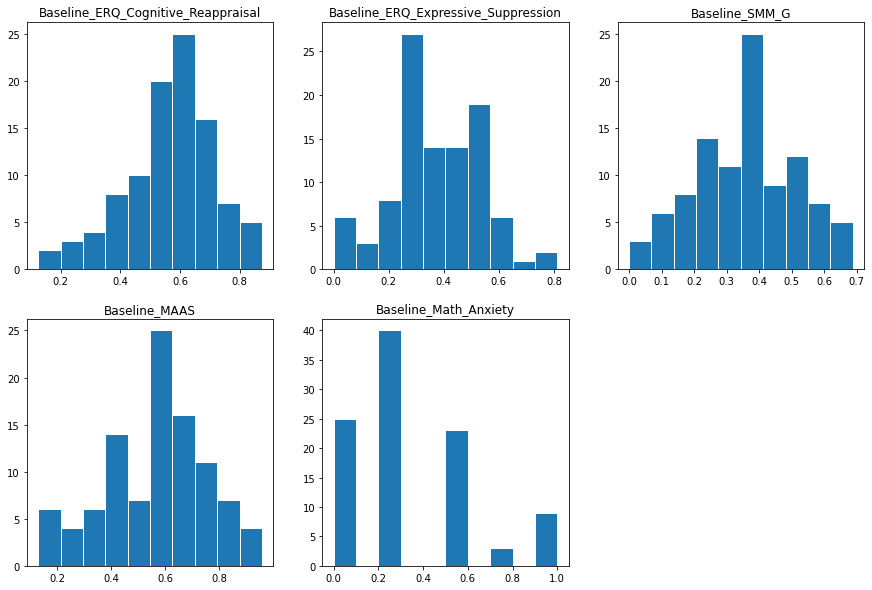

In [155]:
data_base = data_mapping(data_both,data_both_keys,"Baseline")
plt.figure(figsize=(15,10))
for i in range(len(data_base)):
    plt.subplot(2,3,i+1)
    plt.title(data_both_keys[i])
    plt.hist(data_base[i],edgecolor="w")

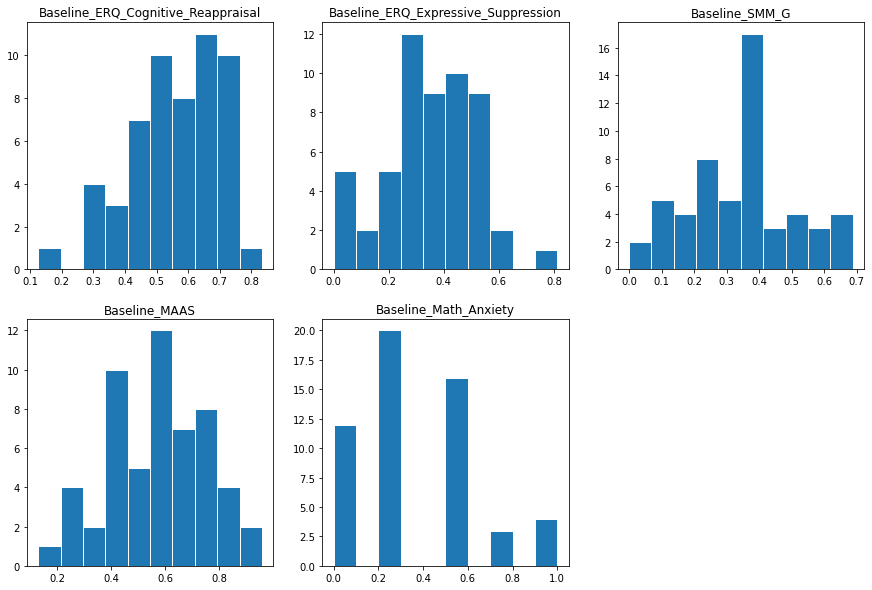

In [192]:
data_base = data_mapping(data_cold_hot,data_both_keys,"Baseline")
plt.figure(figsize=(15,10))
for i in range(len(data_base)):
    plt.subplot(2,3,i+1)
    plt.title(data_both_keys[i])
    plt.hist(data_base[i],edgecolor="w")

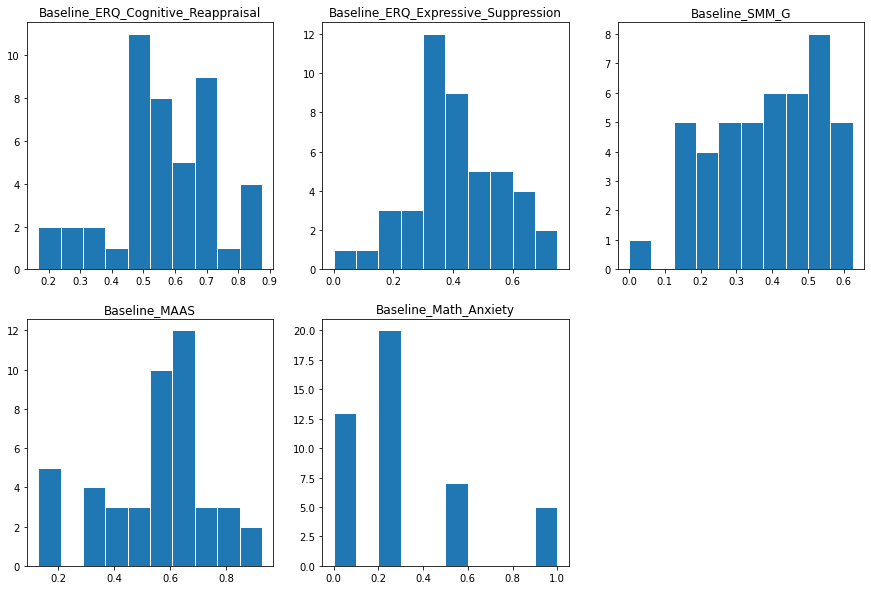

In [193]:
data_base = data_mapping(data_hot_cold,data_both_keys,"Baseline")
plt.figure(figsize=(15,10))
for i in range(len(data_base)):
    plt.subplot(2,3,i+1)
    plt.title(data_both_keys[i])
    plt.hist(data_base[i],edgecolor="w")

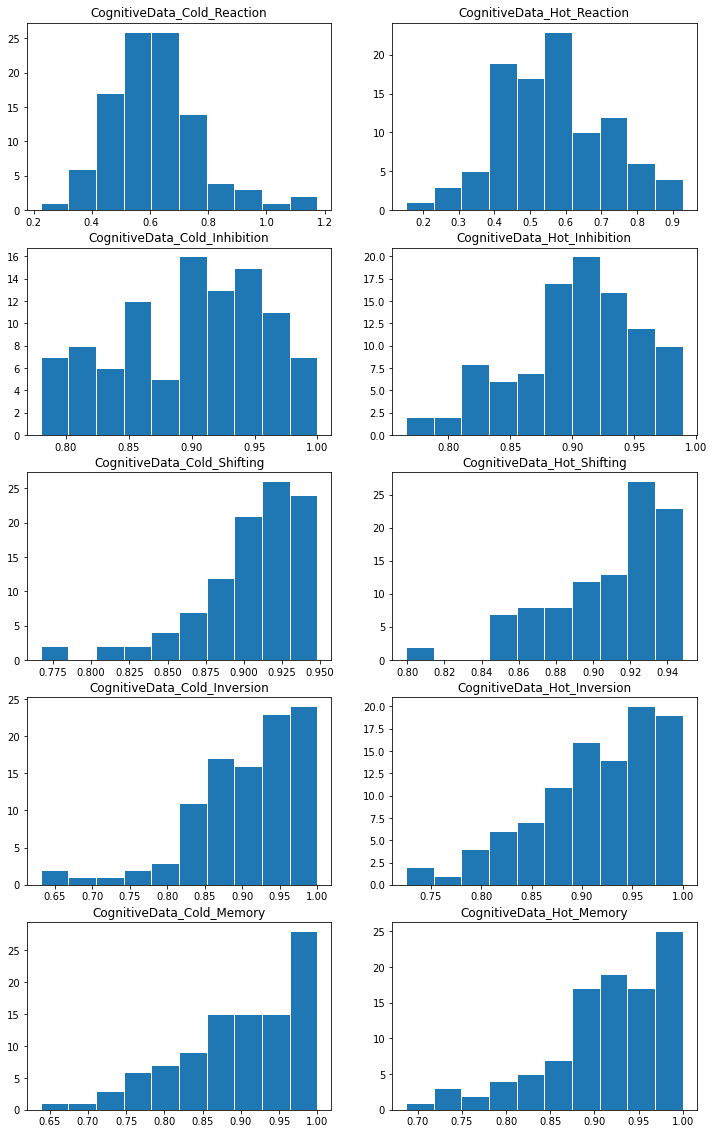

In [168]:
data_CognitiveData = data_mapping(data_both,data_both_keys,"CognitiveData")
keys = np.hstack((data_both_keys[5:10],data_both_keys[22:27]))
plt.figure(figsize=(12,20))
for i in range(int(len(data_CognitiveData)/2)):
    plt.subplot(5,2,i*2+1)
    plt.title(keys[i])
    plt.hist(data_CognitiveData[i],edgecolor="w")
    plt.subplot(5,2,i*2+2)
    plt.title(keys[i+5])
    plt.hist(data_CognitiveData[i+5],edgecolor="w")

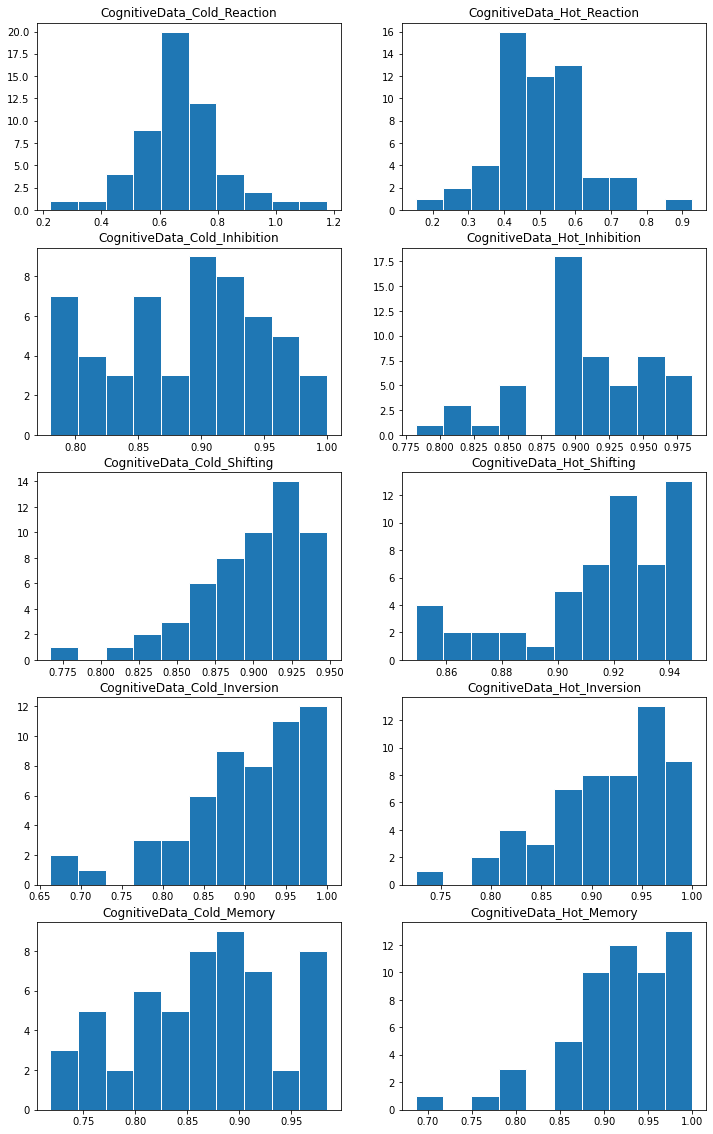

In [194]:
data_CognitiveData = data_mapping(data_cold_hot,data_both_keys,"CognitiveData")
keys = np.hstack((data_both_keys[5:10],data_both_keys[22:27]))
plt.figure(figsize=(12,20))
for i in range(int(len(data_CognitiveData)/2)):
    plt.subplot(5,2,i*2+1)
    plt.title(keys[i])
    plt.hist(data_CognitiveData[i],edgecolor="w")
    plt.subplot(5,2,i*2+2)
    plt.title(keys[i+5])
    plt.hist(data_CognitiveData[i+5],edgecolor="w")

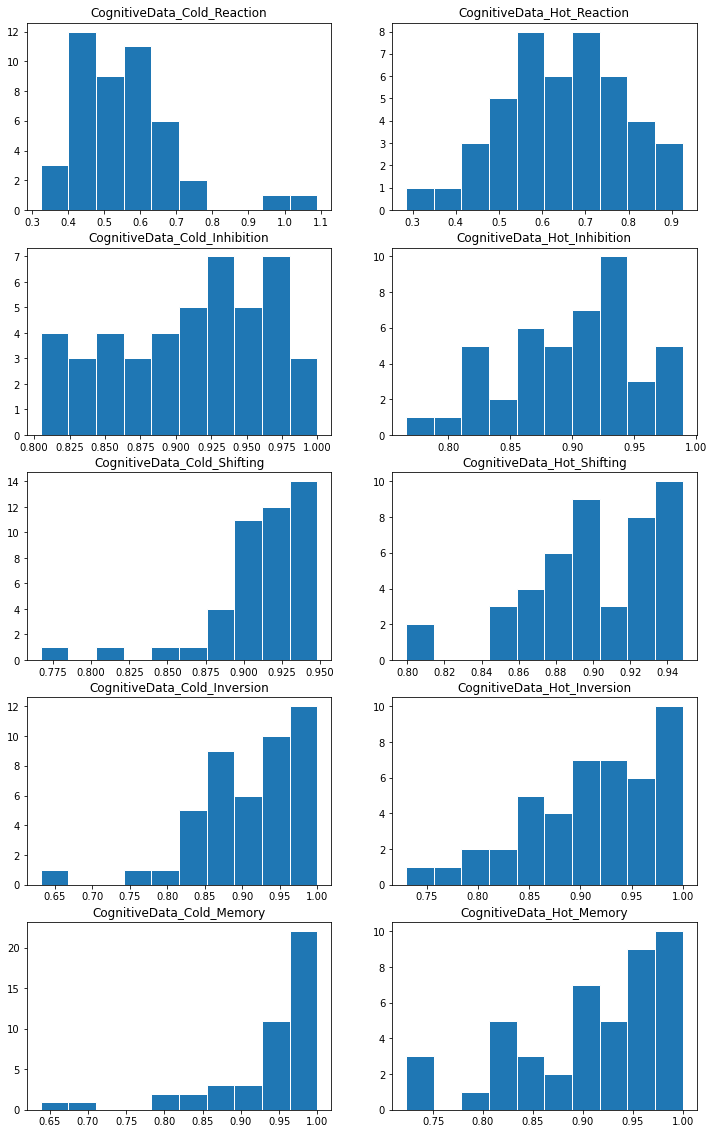

In [195]:
data_CognitiveData = data_mapping(data_hot_cold,data_both_keys,"CognitiveData")
keys = np.hstack((data_both_keys[5:10],data_both_keys[22:27]))
plt.figure(figsize=(12,20))
for i in range(int(len(data_CognitiveData)/2)):
    plt.subplot(5,2,i*2+1)
    plt.title(keys[i])
    plt.hist(data_CognitiveData[i],edgecolor="w")
    plt.subplot(5,2,i*2+2)
    plt.title(keys[i+5])
    plt.hist(data_CognitiveData[i+5],edgecolor="w")

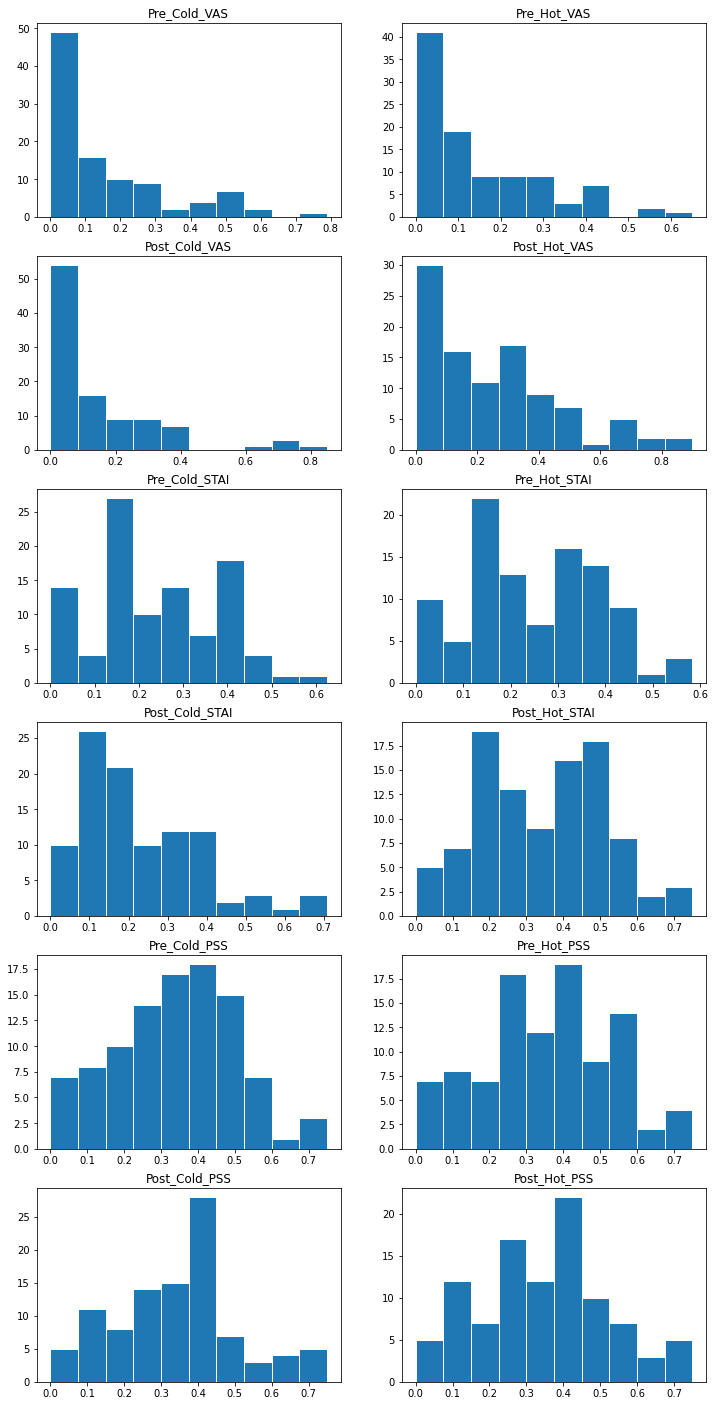

In [172]:
data_pre = data_mapping(data_both,data_both_keys,"Pre")
data_post = data_mapping(data_both,data_both_keys,"Post")
keys = np.hstack((data_both_keys[10:16],data_both_keys[27:33]))
plt.figure(figsize=(12,25))
for i in range(int(len(data_pre)/2)):
    plt.subplot(6,2,i*4+1)
    plt.title(keys[i])
    plt.hist(data_pre[i],edgecolor="w")
    plt.subplot(6,2,i*4+2)
    plt.title(keys[i+6])
    plt.hist(data_post[i],edgecolor="w")
    plt.subplot(6,2,i*4+3)
    plt.title(keys[i+3])
    plt.hist(data_pre[i+3],edgecolor="w")
    plt.subplot(6,2,i*4+4)
    plt.title(keys[i+6+3])
    plt.hist(data_post[i+3],edgecolor="w")

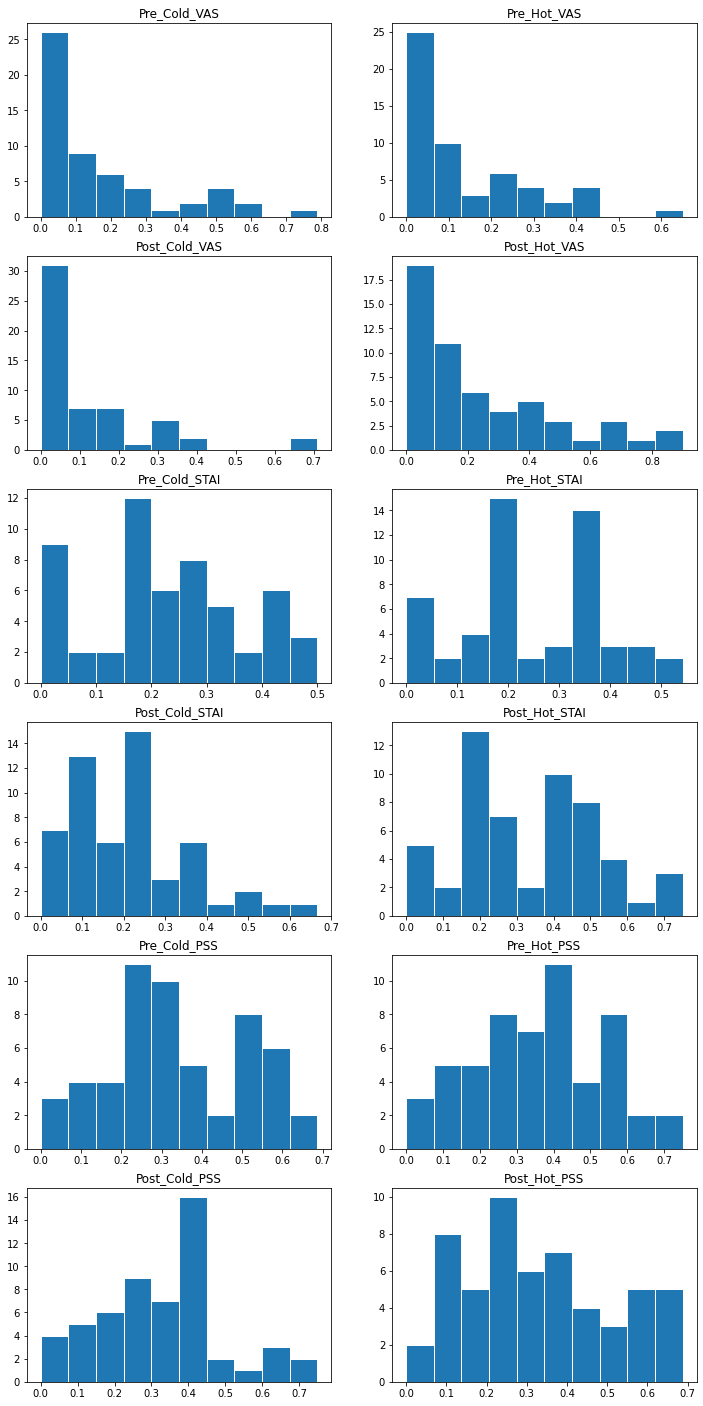

In [196]:
data_pre = data_mapping(data_cold_hot,data_both_keys,"Pre")
data_post = data_mapping(data_cold_hot,data_both_keys,"Post")
keys = np.hstack((data_both_keys[10:16],data_both_keys[27:33]))
plt.figure(figsize=(12,25))
for i in range(int(len(data_pre)/2)):
    plt.subplot(6,2,i*4+1)
    plt.title(keys[i])
    plt.hist(data_pre[i],edgecolor="w")
    plt.subplot(6,2,i*4+2)
    plt.title(keys[i+6])
    plt.hist(data_post[i],edgecolor="w")
    plt.subplot(6,2,i*4+3)
    plt.title(keys[i+3])
    plt.hist(data_pre[i+3],edgecolor="w")
    plt.subplot(6,2,i*4+4)
    plt.title(keys[i+6+3])
    plt.hist(data_post[i+3],edgecolor="w")

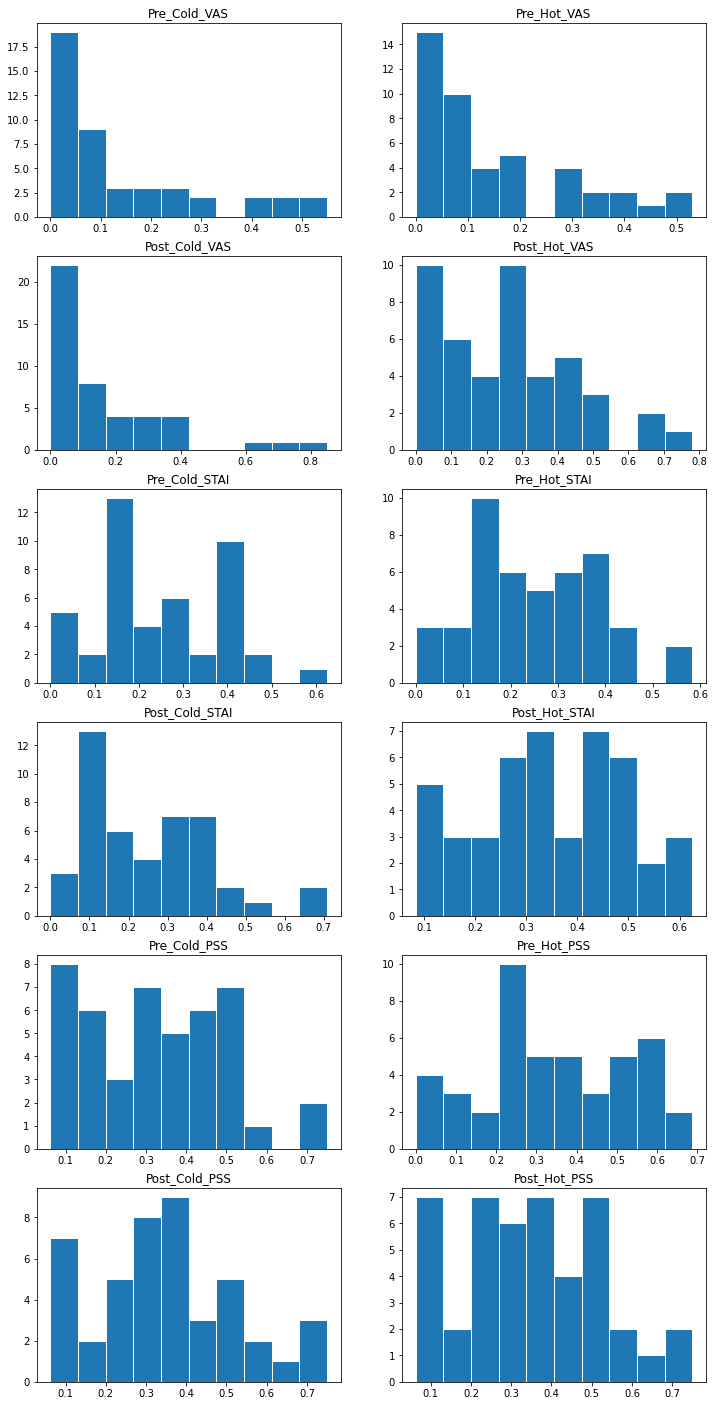

In [197]:
data_pre = data_mapping(data_hot_cold,data_both_keys,"Pre")
data_post = data_mapping(data_hot_cold,data_both_keys,"Post")
keys = np.hstack((data_both_keys[10:16],data_both_keys[27:33]))
plt.figure(figsize=(12,25))
for i in range(int(len(data_pre)/2)):
    plt.subplot(6,2,i*4+1)
    plt.title(keys[i])
    plt.hist(data_pre[i],edgecolor="w")
    plt.subplot(6,2,i*4+2)
    plt.title(keys[i+6])
    plt.hist(data_post[i],edgecolor="w")
    plt.subplot(6,2,i*4+3)
    plt.title(keys[i+3])
    plt.hist(data_pre[i+3],edgecolor="w")
    plt.subplot(6,2,i*4+4)
    plt.title(keys[i+6+3])
    plt.hist(data_post[i+3],edgecolor="w")

In [187]:
# Both
Both_mean = []
Both_std =[]
for i in range(data_both.shape[1]):
    Both_mean.append(np.mean(data_both[:,i]))
    Both_std.append(np.std(data_both[:,i]))

In [186]:
# Cold-Hot
CH_mean = []
CH_std =[]
for i in range(data_cold_hot.shape[1]):
    CH_mean.append(np.mean(data_cold_hot[:,i]))
    CH_std.append(np.std(data_cold_hot[:,i]))

In [189]:
# Hot-Cold
HC_mean = []
HC_std =[]
for i in range(data_hot_cold.shape[1]):
    HC_mean.append(np.mean(data_hot_cold[:,i]))
    HC_std.append(np.std(data_hot_cold[:,i]))

In [190]:
# concatenate all
col = ["Both_mean","Both_std","CH_mean","CH_std","HC_mean","HC_std"]
temp_data = np.array([Both_mean,Both_std,CH_mean,CH_std,HC_mean,HC_std]).T
Analysis = pandas.DataFrame(temp_data,columns=col,index=data_both_keys)
Analysis

,Both_mean,Both_std,CH_mean,CH_std,HC_mean,HC_std
Baseline_ERQ_Cognitive_Reappraisal,0.557083,0.151458,0.555303,0.144349,0.559259,0.159689
Baseline_ERQ_Expressive_Suppression,0.374375,0.164767,0.352273,0.166585,0.401389,0.158382
Baseline_SMM_G,0.357187,0.154253,0.346023,0.159328,0.370833,0.146664
Baseline_MAAS,0.561857,0.192948,0.573506,0.188588,0.547619,0.197214
Baseline_Math_Anxiety,0.327500,0.286564,0.350000,0.276340,0.300000,0.296273
CognitiveData_Cold_Reaction,0.623330,0.157923,0.678887,0.150429,0.555426,0.139214
CognitiveData_Cold_Inhibition,0.898740,0.057529,0.889114,0.059029,0.910505,0.053331
CognitiveData_Cold_Shifting,0.904228,0.036125,0.898872,0.036998,0.910775,0.033899
CognitiveData_Cold_Inversion,0.904962,0.074778,0.901000,0.077134,0.909805,0.071497
CognitiveData_Cold_Memory,0.896891,0.079966,0.867772,0.070183,0.932481,0.076726


### Significant Level

In [ ]:
# 零假设：玩游戏压力前后有差异
# 备择假设：玩游戏前后压力无差异


### Correlation Coefficient Matrix

<AxesSubplot:>

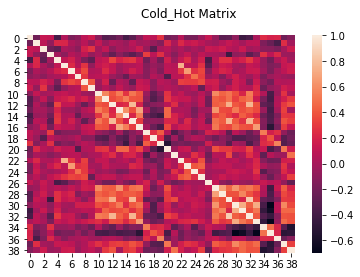

In [95]:
temp = data_cold_hot
plt.suptitle("Cold_Hot Matrix")
# sns.heatmap(np.corrcoef(temp.T), xticklabels = data_hot_cold, yticklabels = data_hot_cold)
sns.heatmap(np.corrcoef(temp.T))

<AxesSubplot:>

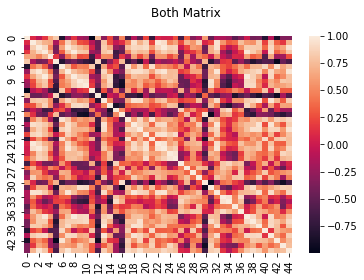

In [222]:
temp = data_base
plt.suptitle("Both Matrix")
# sns.heatmap(np.corrcoef(temp.T), xticklabels = data_hot_cold, yticklabels = data_hot_cold)
sns.heatmap(np.corrcoef(temp.T))

### Principal Component Analysis

[0.23759469 0.10114251] [0.28549931 0.1215352 ]


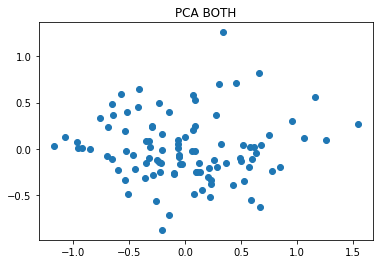

In [204]:
# Both
pca = PCA(n_components=2).fit(data_both)
X_new = pca.transform(data_both)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.title("PCA BOTH")
print(pca.explained_variance_ratio_,pca.explained_variance_)
plt.show()


[0.29388869 0.09267755] [0.36848016 0.11619991]
[0.38333588 0.11456981] [0.21217683 0.06341451]


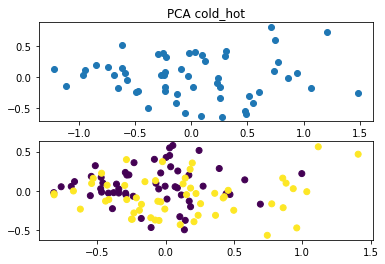

In [116]:
# Cold-Hot
plt.subplot(2,1,1)
pca = PCA(n_components=2).fit(data_cold_hot)
X_new = pca.transform(data_cold_hot)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.title("PCA cold_hot")
print(pca.explained_variance_ratio_,pca.explained_variance_)
plt.subplot(2,1,2)
pca = PCA(n_components=2).fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c = Y)
# plt.title("PCA cold_hot")
print(pca.explained_variance_ratio_,pca.explained_variance_)
plt.show()

[0.20076666 0.14242176] [0.22498257 0.15960027]
[0.38333588 0.11456981] [0.21217683 0.06341451]


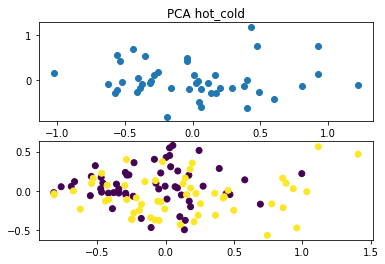

In [191]:
# Hot_cold
plt.subplot(2,1,1)
pca = PCA(n_components=2).fit(data_hot_cold)
X_new = pca.transform(data_hot_cold)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.title("PCA hot_cold")
print(pca.explained_variance_ratio_,pca.explained_variance_)
plt.subplot(2,1,2)
pca = PCA(n_components=2).fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c = Y)
# plt.title("PCA cold_hot")
print(pca.explained_variance_ratio_,pca.explained_variance_)
plt.show()

### DNN

Train on 82 samples, validate on 28 samples
Epoch 1/100
82/82 [==============================] - 1s 10ms/step - loss: 0.6977 - acc: 0.5244 - val_loss: 0.7344 - val_acc: 0.4286
Epoch 2/100
82/82 [==============================] - 0s 316us/step - loss: 0.6921 - acc: 0.5244 - val_loss: 0.7239 - val_acc: 0.4286
Epoch 3/100
82/82 [==============================] - 0s 292us/step - loss: 0.6873 - acc: 0.5244 - val_loss: 0.7130 - val_acc: 0.4286
Epoch 4/100
82/82 [==============================] - 0s 293us/step - loss: 0.6828 - acc: 0.5366 - val_loss: 0.7057 - val_acc: 0.4286
Epoch 5/100
82/82 [==============================] - 0s 390us/step - loss: 0.6813 - acc: 0.5488 - val_loss: 0.7035 - val_acc: 0.4286
Epoch 6/100
82/82 [==============================] - 0s 487us/step - loss: 0.6800 - acc: 0.5366 - val_loss: 0.6977 - val_acc: 0.4643
Epoch 7/100
82/82 [==============================] - 0s 390us/step - loss: 0.6783 - acc: 0.5610 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 8/100
82/82 [=======

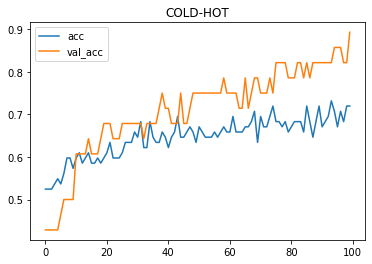

In [220]:
# Cold-Hot
model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(2,activation="sigmoid"))

model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer='sgd',
                metrics=["accuracy"])

history = model.fit(X_train,y_train,batch_size=3,epochs=100,verbose=1,validation_data=(X_test,y_test))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title("COLD-HOT")
plt.show()

Train on 67 samples, validate on 23 samples
Epoch 1/100
67/67 [==============================] - 1s 10ms/step - loss: 0.7113 - acc: 0.5522 - val_loss: 0.7118 - val_acc: 0.4348
Epoch 2/100
67/67 [==============================] - 0s 610us/step - loss: 0.6322 - acc: 0.6418 - val_loss: 0.8123 - val_acc: 0.4348
Epoch 3/100
67/67 [==============================] - 0s 716us/step - loss: 0.5412 - acc: 0.6866 - val_loss: 0.7170 - val_acc: 0.4348
Epoch 4/100
67/67 [==============================] - 0s 597us/step - loss: 0.5946 - acc: 0.6567 - val_loss: 0.7240 - val_acc: 0.4348
Epoch 5/100
67/67 [==============================] - 0s 597us/step - loss: 0.5225 - acc: 0.7612 - val_loss: 0.7871 - val_acc: 0.4348
Epoch 6/100
67/67 [==============================] - 0s 716us/step - loss: 0.5706 - acc: 0.7164 - val_loss: 0.8735 - val_acc: 0.4348
Epoch 7/100
67/67 [==============================] - 0s 597us/step - loss: 0.4981 - acc: 0.7910 - val_loss: 0.7263 - val_acc: 0.4783
Epoch 8/100
67/67 [=======

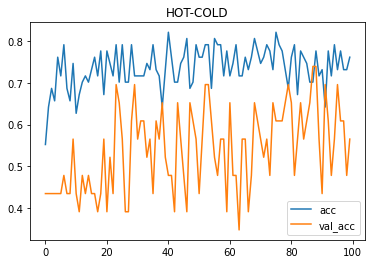

In [93]:
# Hot-Cold
model = Sequential()
model.add(Dense(64,activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(Dense(2,activation="sigmoid"))

model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.SGD(lr=0.1),
                metrics=["accuracy"])

history = model.fit(X_train,y_train,batch_size=3,epochs=100,verbose=1,validation_data=(X_test,y_test))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title("HOT-COLD")
plt.show()

Train on 150 samples, validate on 50 samples
Epoch 1/100
150/150 [==============================] - 0s 3ms/step - loss: 0.6733 - acc: 0.5733 - val_loss: 0.7325 - val_acc: 0.3400
Epoch 2/100
150/150 [==============================] - 0s 483us/step - loss: 0.6717 - acc: 0.5533 - val_loss: 0.7012 - val_acc: 0.5000
Epoch 3/100
150/150 [==============================] - 0s 485us/step - loss: 0.6665 - acc: 0.5867 - val_loss: 0.7160 - val_acc: 0.4600
Epoch 4/100
150/150 [==============================] - 0s 426us/step - loss: 0.6629 - acc: 0.5533 - val_loss: 0.7295 - val_acc: 0.4400
Epoch 5/100
150/150 [==============================] - 0s 480us/step - loss: 0.6590 - acc: 0.5867 - val_loss: 0.7575 - val_acc: 0.3400
Epoch 6/100
150/150 [==============================] - 0s 426us/step - loss: 0.6619 - acc: 0.5933 - val_loss: 0.6826 - val_acc: 0.5800
Epoch 7/100
150/150 [==============================] - 0s 480us/step - loss: 0.6523 - acc: 0.6333 - val_loss: 0.7431 - val_acc: 0.4000
Epoch 8/100


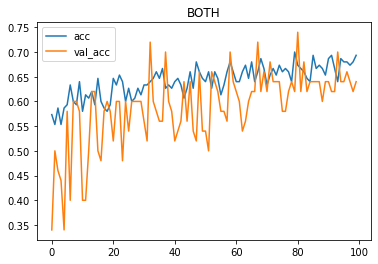

In [86]:
#Both
model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(2,activation="softmax"))

model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer='sgd',
                metrics=["accuracy"])

history = model.fit(X_train,y_train,batch_size=3,epochs=100,verbose=1,validation_data=(X_test,y_test))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title("BOTH")
plt.show()

### SAE

Train on 82 samples, validate on 28 samples
Epoch 1/100
82/82 [==============================] - 1s 11ms/step - loss: 24.7930 - acc: 0.0732 - val_loss: 26.0269 - val_acc: 0.1071
Epoch 2/100
82/82 [==============================] - 0s 487us/step - loss: 24.1880 - acc: 0.1220 - val_loss: 25.7326 - val_acc: 0.1429
Epoch 3/100
82/82 [==============================] - 0s 487us/step - loss: 23.9300 - acc: 0.1220 - val_loss: 25.6218 - val_acc: 0.1429
Epoch 4/100
82/82 [==============================] - 0s 682us/step - loss: 23.8122 - acc: 0.1463 - val_loss: 25.5855 - val_acc: 0.1429
Epoch 5/100
82/82 [==============================] - 0s 585us/step - loss: 23.7589 - acc: 0.1341 - val_loss: 25.5720 - val_acc: 0.1429
Epoch 6/100
82/82 [==============================] - 0s 585us/step - loss: 23.7274 - acc: 0.1707 - val_loss: 25.5716 - val_acc: 0.1786
Epoch 7/100
82/82 [==============================] - 0s 585us/step - loss: 23.7087 - acc: 0.1341 - val_loss: 25.5710 - val_acc: 0.1071
Epoch 8/100


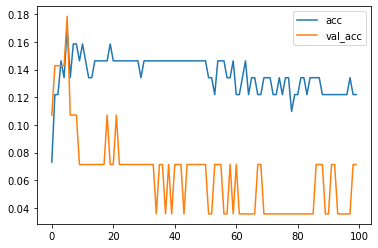

In [102]:
model = Sequential()
model.add(Dense(8,activation="sigmoid"))
model.add(Dense(17,activation="softmax"))

model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer='sgd',
                metrics=["accuracy"])

history = model.fit(X_train,X_train,batch_size=3,epochs=100,verbose=1,validation_data=(X_test,X_test))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.show()